<a href="https://colab.research.google.com/github/Ishan1923/Skin-Cancer-Detection-using-DL-techniques/blob/main/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd
import glob
import seaborn as sns

In [2]:
import kagglehub

# Download the dataset
dataset_path = kagglehub.dataset_download("nodoubttome/skin-cancer9-classesisic")

print("Path to dataset files:", dataset_path)

100%|██████████| 786M/786M [00:08<00:00, 92.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/nodoubttome/skin-cancer9-classesisic/versions/1


In [11]:
ISIC = os.path.join(dataset_path, "Skin cancer ISIC The International Skin Imaging Collaboration")
ISIC

'/root/.cache/kagglehub/datasets/nodoubttome/skin-cancer9-classesisic/versions/1/Skin cancer ISIC The International Skin Imaging Collaboration'

In [12]:
train_test_folder = os.listdir(ISIC)
train_test_folder

['Train', 'Test']

In [19]:
img_dir_train = os.path.join(ISIC, "Train")
classes = os.listdir(img_dir_train)
print("total classes: ", len(classes))
classes

total classes:  9


['vascular lesion',
 'nevus',
 'actinic keratosis',
 'melanoma',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'squamous cell carcinoma']

In [68]:
example_img_path = os.path.join(img_dir_test, classes[0])
os.listdir(example_img_path)
example_img = os.path.join(example_img_path, os.listdir(example_img_path)[0])
example_img


'/root/.cache/kagglehub/datasets/nodoubttome/skin-cancer9-classesisic/versions/1/Skin cancer ISIC The International Skin Imaging Collaboration/Test/vascular lesion/ISIC_0024370.jpg'

image shape (450, 600, 3)


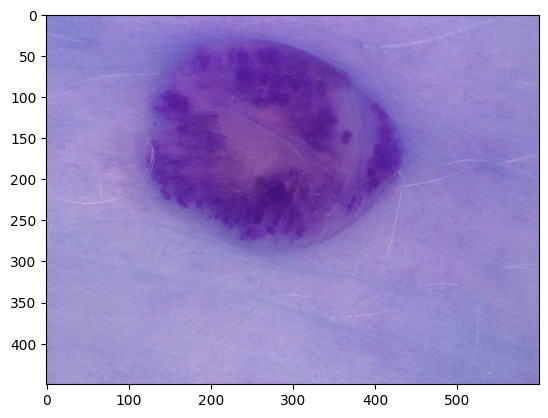

In [70]:
img = cv2.imread(example_img)
print("image shape", img.shape)
plt.imshow(img)

In [26]:

img_addr_list = []
for i in range(len(classes)):
  temp = glob.glob(os.path.join(img_dir_train, classes[i], "*"))
  img_addr_list.append(temp)

total_images = 0;
for i in range(len(img_addr_list)):
  total_images += len(img_addr_list[i])

print("total images: ", total_images)

total images:  2239


In [32]:
img_dir_test = os.path.join(ISIC, "Test")
classes_test = os.listdir(img_dir_test)
img_addr_list_test= []
for i in range(len(classes_test)):
  temp = glob.glob(os.path.join(img_dir_test, classes_test[i], "*"))
  img_addr_list_test.append(temp)

total_images_test = 0;
for i in range(len(img_addr_list_test)):
  total_images_test += len(img_addr_list_test[i])

print("total images: ", total_images_test)

total images:  118


In [37]:
image_paths = []
labels = []
for i, class_list in enumerate(img_addr_list):
  for path in class_list:
    image_paths.append(path)
    labels.append(i)

df = pd.DataFrame({'image_path' : image_paths, 'labels' : labels})
df

image_path  labels
0     /root/.cache/kagglehub/datasets/nodoubttome/sk...       0
1     /root/.cache/kagglehub/datasets/nodoubttome/sk...       0
2     /root/.cache/kagglehub/datasets/nodoubttome/sk...       0
3     /root/.cache/kagglehub/datasets/nodoubttome/sk...       0
4     /root/.cache/kagglehub/datasets/nodoubttome/sk...       0
...                                                 ...     ...
2234  /root/.cache/kagglehub/datasets/nodoubttome/sk...       8
2235  /root/.cache/kagglehub/datasets/nodoubttome/sk...       8
2236  /root/.cache/kagglehub/datasets/nodoubttome/sk...       8
2237  /root/.cache/kagglehub/datasets/nodoubttome/sk...       8
2238  /root/.cache/kagglehub/datasets/nodoubttome/sk...       8

[2239 rows x 2 columns]

example address from df:  /root/.cache/kagglehub/datasets/nodoubttome/skin-cancer9-classesisic/versions/1/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0000309.jpg
image shape (576, 767, 3)


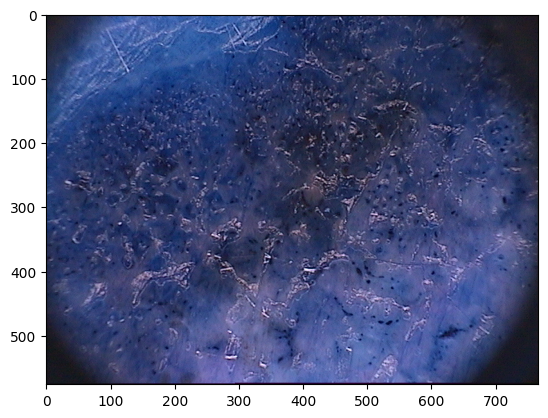

In [77]:
example_img = df.loc[1000, 'image_path']
print("example address from df: ", example_img)
example_img = cv2.imread(example_img)
print("image shape", example_img.shape)
plt.imshow(example_img)

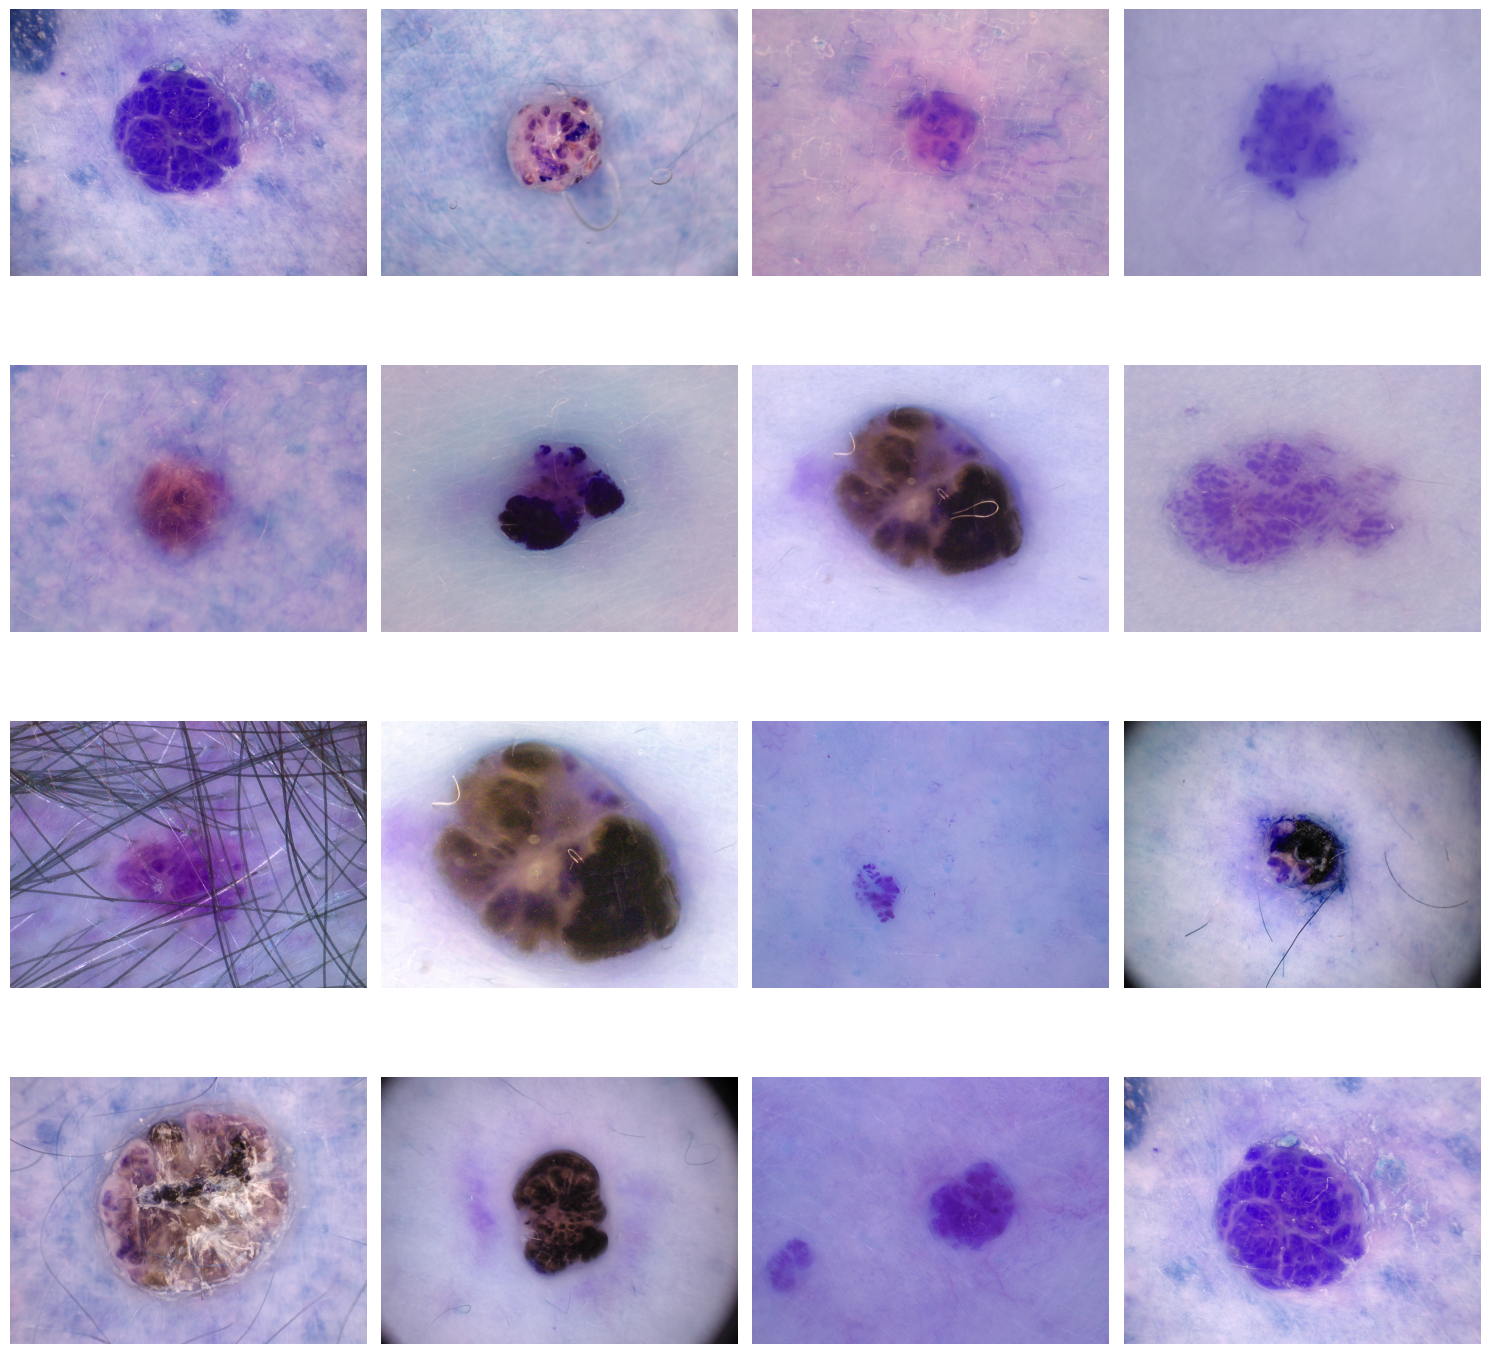

In [91]:
def plot_images(dataframe, rows = 4, cols = 4, x = 15, y = 15, n = 15):
  fig, ax = plt.subplots(rows, cols, figsize = (x, y))
  ax = ax.flatten()
  for i in range(len(dataframe.loc[0:n, 'image_path'])):
    image = cv2.imread(dataframe.loc[i, 'image_path'])
    ax[i].imshow(image)
    ax[i].axis('off')
  plt.tight_layout()
  plt.show()

plot_images(df)


In [51]:
# taken from https://keras.io/examples/keras_recipes/creating_tfrecords/

IMG_CHANNELS = 3

def image_feature(value):
    """Returns a bytes_list from a string / byte."""
    return tf.train.Feature(
        bytes_list=tf.train.BytesList(value=[tf.io.encode_jpeg(value).numpy()])
    )


def bytes_feature(value):
    """Returns a bytes_list from a string / byte."""
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value.encode()]))


def float_feature(value):
    """Returns a float_list from a float / double."""
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))


def int64_feature(value):
    """Returns an int64_list from a bool / enum / int / uint."""
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))


def float_feature_list(value):
    """Returns a list of float_list from a float / double."""
    return tf.train.Feature(float_list=tf.train.FloatList(value=value))

def read_and_decode(filename):
  img = tf.io.read_file(filename=filename)
  img = tf.image.decode_jpg(img, channels=IMG_CHANNELS)
  img = tf.image.convert_image_dtype(img, tf.float32)
  return img


def create_example(image, path, example):
    feature = {
        "image": image_feature(image),
        "path": bytes_feature(path),
        "area": float_feature(example["area"]),
        "bbox": float_feature_list(example["bbox"]),
        "category_id": int64_feature(example["category_id"]),
        "id": int64_feature(example["id"]),
        "image_id": int64_feature(example["image_id"]),
    }
    return tf.train.Example(features=tf.train.Features(feature=feature))

def parse_tfrecord_fn(example):
    feature_description = {
        "image": tf.io.FixedLenFeature([], tf.string),
        "path": tf.io.FixedLenFeature([], tf.string),
        "area": tf.io.FixedLenFeature([], tf.float32),
        "bbox": tf.io.VarLenFeature(tf.float32),
        "category_id": tf.io.FixedLenFeature([], tf.int64),
        "id": tf.io.FixedLenFeature([], tf.int64),
        "image_id": tf.io.FixedLenFeature([], tf.int64),
    }
    example = tf.io.parse_single_example(example, feature_description)
    example["image"] = tf.io.decode_jpeg(example["image"], channels=IMG_CHANNELS)
    example["bbox"] = tf.sparse.to_dense(example["bbox"])
    return example

def create_tfrecord(filename, label_int):
  img = read_and_decode(filename)
  dims = img.shape
  img = tf.reshape(img, [-1]) # ---> flattens to 1-D array
  return tf.train.Example(feature = tf.train.Features(feature = {
      'image' : _float_feature(img),
      'label_int' : _int64_feature(lebel_int),
  }))

In [54]:
!pip install pandas-tfrecords

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 34.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.5.1 which is incompatible.


In [55]:
# with beam.Pipeline() as p:
#   (p
#    | 'input' >> beam.Create(train.values)
#    | 'create_tfr' >> beam.Map(lambda x: createq_tfrecord(x[0], x[1], LABELS.index(x[1])))
#    | 'write' >> beam.io.tfrecordio.WriteToTFRecord('output/train', file_name_suffix = '.gz')
#   )

In [58]:
from pandas_tfrecords import pd2tf

img_tfr = pd2tf(df, './tfrecorder')
print(img_tfr)

None


In [96]:
# Define the parsing function (adjust feature names and types based on how you saved them)
def parse_tfrecord_example(example_proto):
    # Define the features you expect to find in your TFRecords
    feature_description = {
        'image': tf.io.FixedLenFeature([], tf.string),  # Assuming image was saved as a byte string
        'label': tf.io.FixedLenLenFeature([], tf.int64),   # Assuming label was saved as an integer
        # Add other features if you saved them
    }
    return tf.io.parse_single_example(example_proto, feature_description)

# Define the path to your TFRecord file(s)
tfrecords_directory = './tfrecorder'  # The directory where the TFRecords are saved

# Find all TFRecord files in the directory
# pandas-tfrecords typically saves files with a .tfrecord extension
tfrecords_file_paths = glob.glob(os.path.join(tfrecords_directory, '*.tfrecord'))

# Create a TFRecordDataset using the list of file paths
dataset = tf.data.TFRecordDataset(tfrecords_file_paths)

# Map the parsing function to the dataset
# Add num_parallel_calls for better performance
dataset = dataset.map(parse_tfrecord_example, num_parallel_calls=tf.data.AUTOTUNE)

# You can now further process the dataset for training/evaluation
# For example, to decode the image and extract label:
def decode_image_and_label(example):
    # Decode the image (adjust channels as needed). Ensure the image was saved
    # as a byte string in the TFRecord creation process.
    # pd2tf saves the image as a byte string of the compressed image.
    image = tf.io.decode_jpeg(example['image'], channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)  # Convert to float32
    label = example['label']
    return image, label

# Map the decoding function
# Add num_parallel_calls for better performance
dataset = dataset.map(decode_image_and_label, num_parallel_calls=tf.data.AUTOTUNE)


# Example of how to iterate and get a batch (for demonstration)
# Remember to configure batching, shuffling, etc.
# for actual use
dataset = dataset.batch(32).prefetch(tf.data.AUTOTUNE) # Add prefetching for performance

for image_batch, label_batch in dataset.take(1):
    print("Image batch shape:", image_batch.shape)
    print("Label batch shape:", label_batch.shape)
#     # You can now use these batches in your model

print("Dataset created and ready for further processing.")

AttributeError: in user code:

    File "/tmp/ipython-input-96-4134712932.py", line 4, in parse_tfrecord_example  *
        feature_description = {

    AttributeError: module 'tensorflow._api.v2.io' has no attribute 'FixedLenLenFeature'
